<a href="https://colab.research.google.com/github/nitiruen/Basic-Tensorflow-and-Keras/blob/main/Keras_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task is to classify the images in 10 class 0-9 number of handwritten digit.**


In [30]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, MaxPooling2D, Conv2D

import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data
* Dataset size 60,000 samples of handwritten images.
* The size of each image is 28x28 pixels.
* Each pixel has value in the range of [0,255] where 0 represents black, and 255 represents white.
* The label of image has 0-9 digit

In [31]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [32]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [33]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

**Reshape to (60000,28,28,1)**

**60,000 number of examples**

***28 x 28 pixels***

***1 gray color (3 is for RGB colors)***

In [34]:
X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test = X_test.reshape(10000,28,28,1).astype('float32')

**Show example image of MNIST**

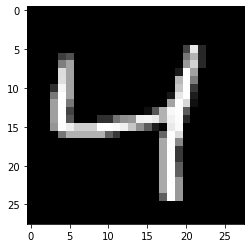

In [35]:
plt.imshow(X_train[2].reshape(28,28), cmap = 'gray')

**To reduce saturation of neural network we divide max scale.**

In [36]:
X_train[0].max(), X_test[0].max()

(255.0, 255.0)

In [37]:
X_train /= 255
X_test /= 255

In [38]:
X_train[2].max()

1.0

In [39]:
X_test[2].max()

1.0

**One hot encoding by Keras**

In [40]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

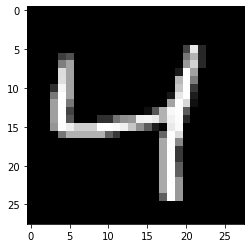

In [41]:
plt.imshow(X_train[2].reshape(28,28), cmap = 'gray')
y_train[2]

In [42]:
y_train.shape

(60000, 10)

**Step1: Build model**

In [43]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

**Step2: Complie model**


In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Step3: Train model**

In [45]:
model.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1,validation_data=(X_test,y_test))

Epoch 1/15
469/469 [==============================] - 142s 303ms/step - loss: 0.2382 - accuracy: 0.9284 - val_loss: 0.0524 - val_accuracy: 0.9834
Epoch 2/15
469/469 [==============================] - 140s 299ms/step - loss: 0.0841 - accuracy: 0.9750 - val_loss: 0.0385 - val_accuracy: 0.9862
Epoch 3/15
469/469 [==============================] - 142s 302ms/step - loss: 0.0627 - accuracy: 0.9803 - val_loss: 0.0329 - val_accuracy: 0.9889
Epoch 4/15
469/469 [==============================] - 139s 296ms/step - loss: 0.0520 - accuracy: 0.9841 - val_loss: 0.0300 - val_accuracy: 0.9893
Epoch 5/15
469/469 [==============================] - 138s 295ms/step - loss: 0.0431 - accuracy: 0.9870 - val_loss: 0.0266 - val_accuracy: 0.9913
Epoch 6/15
469/469 [==============================] - 139s 296ms/step - loss: 0.0376 - accuracy: 0.9883 - val_loss: 0.0296 - val_accuracy: 0.9910
Epoch 7/15
469/469 [==============================] - 140s 299ms/step - loss: 0.0347 - accuracy: 0.9885 - val_loss: 0.0286 -

**Step4: Evaluate model**

In [49]:
pred = model.evaluate(X_test, y_test)
print('\nLoss = ' + str(pred[0]))
print('Test Accuracy = ' + str(pred[1]))

313/313 [==============================] - 7s 21ms/step - loss: 0.0262 - accuracy: 0.9918

Loss = 0.026232711970806122
Test Accuracy = 0.9918000102043152
